# Exoplanet transit modelling



In [1]:
# Import some python basic  modules
import numpy as np
import matplotlib.pyplot as plt

# Import the module that has the transit model (forTrans)
from PyAstronomy.modelSuite import forTrans as ft

In [2]:
ft.MandelAgolLC?


Init signature: ft.MandelAgolLC(orbit='circular', ld='quad', collCheck=True)
Docstring:     
Analytical transit light-curves using the formulae provided by Mandel & Agol 2002.

.. note :: The computation of transit light curves
           is done using the external *occultquad* FORTRAN library.
           
           This library can be installed, e.g., via
           
           pip install PyAstronomy_ext
           
           It can also be compiled manually using SciPy's f2py
           wrapper (http://www.scipy.org/F2py). Simply go to the
           *forTrans* directory of the source distribution of PyAstronomy,
           then invoke

           f2py -c occultquad.pyf occultquad.f

           f2py -c occultnl.pyf occultnl.f

:Model parameters:

The set of parameters specifying this model depends on: the type
of orbit chosen (circular or keplerian) and the type of limb darkening
chosen (quadratic or non-linear).

More information on the Keplerian orbit can be found here: :ref:`ke

The code below sets some parameters for the planet and then plots the relative flux of the star (energy per unit time and unit area). When the relative flux is 1 then the planet does not block the light from the star. When the relative flux is say 0.95, it means that the planet blocks 5% of the stellar light.

Run the code to see the transit graph. Then modify the parameters 1 to 5 and run again to get a feel how these parameters affect the transit curve

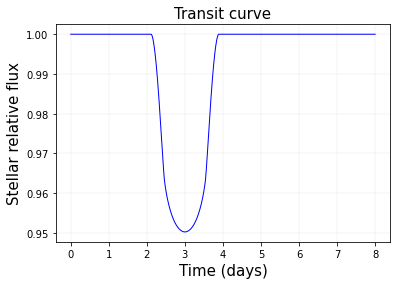

In [3]:
# Create MandelAgolLC object (planet) with circular orbit and quadratic limb darkening
planet =  ft.MandelAgolLC(orbit="circular", ld="quad")

# Set parameters of planetary system
# "planet" contains the properties of the plane that determine the transit curve

#Parameter 1: Planet orbital period (days)
planet["per"] = 6
#Parameter 2:Orientation of the planet orbit with respect to the observed
# (i=90 degrees, means the planet transits through the middle of the stellar disc)
planet["i"] = 90
#Parameter 3:Semi-major axis of planetary orbit [stellar radii]
planet["a"] = 1.5
#Parameter 4: Time offset of transit center (effectively where is the lowest drop of the stellar flux)
planet["T0"] = 3.
#Parameter 5: Radius ratio between planet and star.
planet["p"] = 0.2

#Other parameters (do not modify these)
planet["linLimb"] = 0.5
planet["quadLimb"] = 0.2
planet["b"] = 0.

# Choose some time axis
# this defines the time sampling (how often do you observe the star)
time = np.linspace(0, 8, 1000)

# Calculate the time evolution of the stellar brightness using the transit model
# The function evaluate acts on "planet" to give the stellar_flux vs time
stellar_flux = planet.evaluate(time)

plt.title ("Transit curve", fontsize = 15)
plt.xlabel("Time (days)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)

# put grid on the graph
plt.grid(color='grey', linestyle=':', linewidth=0.2)
plt.grid(True)

# Let's see what happened ...
plt.plot(time, stellar_flux, color='blue', linewidth=1)

plt.show()

## Task 1: The effect of the size of the planet



## Task 2: The effect of the planet semi-major axis

## Task 3: The effect of the orientation of the planet orbit  

## Task 4: Multi-planetary systems

Plot the stellar relative flux of a planetary system consisting of two planets with the following parameters

### System I

Planet 1:per1=2 days, a1=2, p1= 0.01

Planet 2:per1=3 days, a1=3, p1= 0.1

### System II
Planet 1


Hint: For each system you need to define two "planets" and then add them together  to find the final effect on the star.

In [27]:
# create planet 1
planet1 =  ft.MandelAgolLC(orbit="circular", ld="quad")
#set planet 1 properties
planet1["per"]= 6
planet1["a"] = 1.5
planet1["T0"] = 3.
planet1["p"] = 0.2


#Other parameters (do not modify these)
planet1["i"] = 90
planet1["linLimb"] = 0.5
planet1["quadLimb"] = 0.2
planet1["b"] = 0.

# create planet 2
planet2 =  ft.MandelAgolLC(orbit="circular", ld="quad")
#set planet 1 properties
planet2["per"]= 2
planet2["a"] = 2
planet2["T0"] = 4.
planet2["p"] = 0.04

#Other parameters (do not modify these)
planet2["i"] = 90
planet2["linLimb"] = 0.5
planet2["quadLimb"] = 0.2
planet2["b"] = 0.


In [28]:
time = np.linspace(0, 8, 1000)
stellar_flux1 = planet1.evaluate(time)
stellar_flux2 = planet2.evaluate(time)


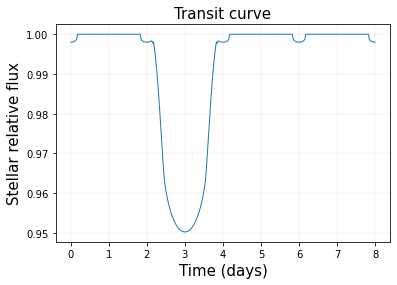

In [29]:
plt.title ("Transit curve", fontsize = 15)
plt.xlabel("Time (days)", fontsize = 15)
plt.ylabel("Stellar relative flux", fontsize = 15)

# put grid on the graph
plt.grid(color='grey', linestyle=':', linewidth=0.2)
plt.grid(True)

# Let's see what happened ...
#plt.plot(time, stellar_flux1, color='blue', linewidth=1)
#plt.plot(time, stellar_flux2, color='red', linewidth=1)

plt.plot(time, stellar_flux2+stellar_flux1-1, linewidth=1)

plt.show()

It becomes more confusing the more planets you have (and we also need to take into account the presence of stars -- binary systems--, and the change of the flux of the star).